In [1]:
import tensorflow as tf
import torch
from tensorflow import keras

2022-04-27 00:02:52.037921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 00:02:52.037949: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [4]:
torch.__version__

'1.11.0+cu102'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

2022-04-27 00:02:57.463620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 00:02:57.465032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 00:02:57.465455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-27 00:02:57.465574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-27 00:02:57.465680: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

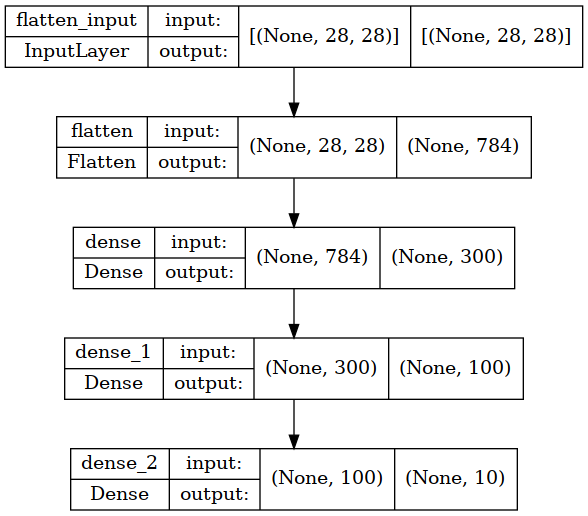

In [13]:
keras.utils.plot_model(model, show_shapes=True)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer("dense") is hidden1

True

In [18]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)


To get more information about losses, optimizers, and metrics, please refer to:
- [losses](https://keras.io/losses/)
- [optimizers](https://keras.io/optimizers/)
- [metrics](https://keras.io/metrics/)

In [19]:
history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)

Epoch 1/30


2022-04-27 00:02:58.736083: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.7270 - accuracy: 0.7638 - val_loss: 0.5126 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4898 - accuracy: 0.8295 - val_loss: 0.4606 - val_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4453 - accuracy: 0.8439 - val_loss: 0.4167 - val_accuracy: 0.8608
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4185 - accuracy: 0.8532 - val_loss: 0.4096 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3979 - accuracy: 0.8601 - val_loss: 0.3850 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8664 - val_loss: 0.3871 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3683 - accuracy: 0.8704 - val_loss: 0.3745 - val_accuracy: 0.8720


In [20]:
history.history["loss"]

[0.727044403553009,
 0.4897545874118805,
 0.4453113377094269,
 0.4185119569301605,
 0.39789992570877075,
 0.38160794973373413,
 0.36827486753463745,
 0.35603994131088257,
 0.345138818025589,
 0.3368566036224365,
 0.3271569609642029,
 0.3199886381626129,
 0.31086719036102295,
 0.30519184470176697,
 0.29749929904937744,
 0.2926774322986603,
 0.28565168380737305,
 0.280426025390625,
 0.2752474248409271,
 0.2709275484085083,
 0.26419544219970703,
 0.25954803824424744,
 0.25623172521591187,
 0.2523908317089081,
 0.24707260727882385,
 0.2426893413066864,
 0.2385668009519577,
 0.23543043434619904,
 0.23137453198432922,
 0.22704310715198517]

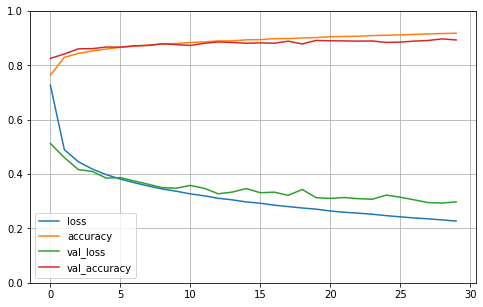

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [24]:
X_test = X_test / 255.0
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8855


[0.32848885655403137, 0.8855000138282776]

In [25]:
x_new = X_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
import numpy as np
y_pred = np.argmax(model.predict(x_new), axis=-1) # instad of model.predict_classes()
y_pred

array([9, 2, 1])